# TP2 - Regression

In [1]:
fn1 = "amine"
ln1 = "azammam"
filename = "_".join(map(lambda s: s.strip().lower(),
["SD-TSIA204_lab2", ln1, fn1])) + ".ipynb"
print(filename)

sd-tsia204_lab2_azammam_amine.ipynb


In [2]:
import random
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import pylab
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import Lasso
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



df = pd.read_csv('meatspec.csv')
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V92,V93,V94,V95,V96,V97,V98,V99,V100,fat
0,2.61776,2.61814,2.61859,2.61912,2.61981,2.62071,2.62186,2.62334,2.62511,2.62722,...,2.98145,2.96072,2.94013,2.91978,2.89966,2.87964,2.85960,2.83940,2.81920,22.5
1,2.83454,2.83871,2.84283,2.84705,2.85138,2.85587,2.86060,2.86566,2.87093,2.87661,...,3.29186,3.27921,3.26655,3.25369,3.24045,3.22659,3.21181,3.19600,3.17942,40.1
2,2.58284,2.58458,2.58629,2.58808,2.58996,2.59192,2.59401,2.59627,2.59873,2.60131,...,2.68951,2.67009,2.65112,2.63262,2.61461,2.59718,2.58034,2.56404,2.54816,8.4
3,2.82286,2.82460,2.82630,2.82814,2.83001,2.83192,2.83392,2.83606,2.83842,2.84097,...,2.97367,2.94951,2.92576,2.90251,2.87988,2.85794,2.83672,2.81617,2.79622,5.9
4,2.78813,2.78989,2.79167,2.79350,2.79538,2.79746,2.79984,2.80254,2.80553,2.80890,...,3.30025,3.27907,3.25831,3.23784,3.21765,3.19766,3.17770,3.15770,3.13753,25.5


### Q1-a

In [3]:
random.seed(0)

### Q1-b

In [4]:
means = df.mean()
stds = df.std()
for column in df.columns:
    print(f'{column}: Mean={means[column]}, Standard Deviation={stds[column]}')

V1: Mean=2.80856088372093, Standard Deviation=0.4107932647684502
V2: Mean=2.811137162790698, Standard Deviation=0.4133521229649966
V3: Mean=2.813726790697675, Standard Deviation=0.41590561245146035
V4: Mean=2.8163631162790703, Standard Deviation=0.4184653262348079
V5: Mean=2.819097627906977, Standard Deviation=0.4210404079920405
V6: Mean=2.821982976744186, Standard Deviation=0.4236354403968775
V7: Mean=2.8250641860465118, Standard Deviation=0.42624532705324925
V8: Mean=2.82837511627907, Standard Deviation=0.4288660865779574
V9: Mean=2.8319430697674424, Standard Deviation=0.43150974861348884
V10: Mean=2.835813441860465, Standard Deviation=0.4341945559602071
V11: Mean=2.839957302325582, Standard Deviation=0.4369064738721321
V12: Mean=2.844390465116279, Standard Deviation=0.43965313316376714
V13: Mean=2.849151720930233, Standard Deviation=0.4424463051706659
V14: Mean=2.8542884186046513, Standard Deviation=0.44530343949962664
V15: Mean=2.8598438604651166, Standard Deviation=0.4482389419066

    Since the mean is not null, the data is not centered, and is not standardized.
    The data
    

### Q1-c

In [5]:
train_data, test_data = train_test_split(df, test_size=0.25)

# Standardize the training and testing data using StandardScaler
standardScaler = StandardScaler()
scaled_train_data = pd.DataFrame(standardScaler.fit_transform(train_data), columns = ["V"+str(i) for i in range(1,101)]+["fat"])
scaled_test_data = pd.DataFrame(standardScaler.transform(test_data), columns = ["V"+str(i) for i in range(1,101)]+["fat"])

In [6]:
# Split the data into features (X) and target (y)
x = scaled_train_data.drop("fat", axis=1)
y = scaled_train_data["fat"]

x_test = scaled_test_data.drop("fat", axis=1)
y_test = scaled_test_data["fat"]

# Fit the OLS regression model
fit_ols = sm.OLS(y, x).fit()

print(fit_ols.summary())

                                 OLS Regression Results                                
Dep. Variable:                    fat   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.992
Method:                 Least Squares   F-statistic:                              196.5
Date:                Fri, 17 Feb 2023   Prob (F-statistic):                    2.24e-55
Time:                        01:06:31   Log-Likelihood:                          236.69
No. Observations:                 161   AIC:                                     -273.4
Df Residuals:                      61   BIC:                                      34.77
Df Model:                         100                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

### Q1-d

In [7]:
# Extract the R2 coefficients from the model
r2 = fit_ols.rsquared

# Store the R2 coefficients in a pandas DataFrame
df_coef = pd.DataFrame({'R2': [r2]})
print(df_coef)


         R2
0  0.996905


### Q2

In [12]:
def forward_selection(X, y):
    """Forward variable selection for linear regression"""
    remaining = set(X.columns)
    selected = []
    order = []
    pvalues = []
    while remaining:
        best_pval = float('inf')
        for candidate in remaining:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[selected + [candidate]]))).fit()
            pval = model.pvalues[candidate]
            if pval < best_pval:
                best_feature = candidate
                best_pval = pval
                best_model = model
        remaining.remove(best_feature)
        selected.append(best_feature)
        order.append(best_feature)
        pvalues.append(best_pval)
    return order, pvalues

print(forward_selection(x, y))

(['V41', 'V20', 'V49', 'V21', 'V1', 'V57', 'V74', 'V100', 'V44', 'V50', 'V40', 'V99', 'V19', 'V23', 'V5', 'V8', 'V39', 'V35', 'V27', 'V36', 'V33', 'V91', 'V87', 'V97', 'V2', 'V60', 'V81', 'V77', 'V17', 'V63', 'V62', 'V67', 'V3', 'V31', 'V45', 'V46', 'V56', 'V22', 'V25', 'V64', 'V86', 'V11', 'V80', 'V29', 'V30', 'V28', 'V92', 'V83', 'V48', 'V26', 'V98', 'V52', 'V53', 'V55', 'V54', 'V59', 'V61', 'V75', 'V58', 'V73', 'V71', 'V70', 'V18', 'V66', 'V4', 'V32', 'V94', 'V16', 'V10', 'V15', 'V42', 'V85', 'V84', 'V82', 'V51', 'V90', 'V12', 'V13', 'V14', 'V96', 'V95', 'V89', 'V43', 'V37', 'V76', 'V24', 'V69', 'V68', 'V47', 'V72', 'V78', 'V65', 'V88', 'V6', 'V79', 'V9', 'V34', 'V38', 'V7', 'V93'], [3.13623660833839e-16, 3.6639167104270024e-59, 2.556274880707012e-23, 4.049344100192471e-08, 0.002153522389736822, 0.0006894617389834401, 0.031152780204586374, 0.031877425916033236, 0.0021010874980486815, 0.00595807931078928, 2.4541239134562376e-07, 4.879266934315593e-06, 0.010798773755898375, 2.61829538

In [13]:
rejected_variables = []
fvs = forward_selection(x, y)
order = fvs[0]
pvalues = fvs[1]

for i in range(len(pvalues)):
    if pvalues[i]>=0.05: 
       rejected_variables.append(order[i])
print(len(rejected_variables))

69


### Q-5

In [ ]:
def ridge_estimator(X,Y, lb):
    n = X.shape[0]
    p = X.shape[1]
    inverted_part = np.linalg.inv(np.matmul(np.transpose(X),X)+n*lb*np.identity(p))
    x_transp_y = np.matmul(np.transpose(X), Y)
    rdg = np.matmul(inverted_part, x_transp_y)
    return rdg

In [ ]:
thetas = []
alpha_list = np.logspace(-9,2,num=50)
for a in alpha_list:
    theta = ridge_estimator(x, y, a)
    thetas.append(theta)
plt.xscale("log")    
plt.plot(alpha_list,thetas)

In [ ]:


alpha_range = np.logspace(-9, 2, num=50)

# Train Ridge regression model with different alpha values and compute MSE for both train and test sets
train_mse = []
test_mse = []
min_test_mse = float('inf')
min_test_mse_alpha = None

for a in alpha_range:
    theta = ridge_estimator(x,y,a)
    y_pred = np.matmul(x,theta)
    y_test_pred = np.matmul(x_test, theta)
    train_mse.append(mean_squared_error(y, y_pred))
    test_mse.append(mean_squared_error(y_test, y_test_pred))
    if test_mse[-1] < min_test_mse:
        min_test_mse = test_mse[-1]
        min_test_mse_alpha = alpha

# Plot results
plt.plot(alpha_range, train_mse, label='train')
plt.plot(alpha_range, test_mse, label='test')
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('MSE')
plt.title('MSE vs alpha for Ridge Regression')
plt.legend()
plt.scatter(min_test_mse_alpha, min_test_mse, color='red', marker='o')
plt.show()

In [ ]:
alpha = 10**(-9)
theta = ridge_estimator(x,y,alpha)
y_pred = np.matmul(x_test,theta)

r2 = r2_score(y_test, y_pred)

print("r2 score:",r2)



### Q-6

/home/kami/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.154e+01, tolerance: 1.610e-02
  model = cd_fast.enet_coordinate_descent(
/home/kami/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.154e+01, tolerance: 1.610e-02
  model = cd_fast.enet_coordinate_descent(
/home/kami/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1

/home/kami/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.204e+01, tolerance: 1.610e-02
  model = cd_fast.enet_coordinate_descent(
/home/kami/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.212e+01, tolerance: 1.610e-02
  model = cd_fast.enet_coordinate_descent(
/home/kami/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1

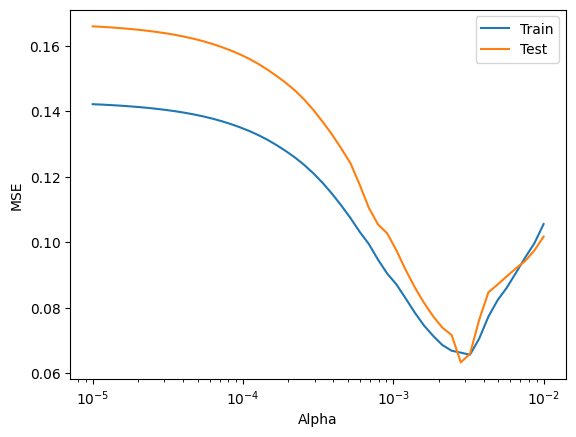

In [56]:
alphas = np.logspace(-5, -2, num=50)

# Create an empty list to store the MSE values for each alpha value
mse_train = []
mse_test = []

# Loop over the alpha values, fit the Lasso model, and compute the MSE for both the training and testing sets
for alpha in alphas:
    # Create and fit the Lasso model
    model = Lasso(alpha=alpha)
    model.fit(x, y)
    
    # Compute the MSE for the training set
    mse_train.append(np.mean((model.predict(x) - y) ** 2))
    
    # Compute the MSE for the testing set
    mse_test.append(np.mean((model.predict(x_test) - y_test) ** 2))

# Plot the MSE values for the training and testing sets as a function of alpha
plt.plot(alphas, mse_train, label='Train')
plt.plot(alphas, mse_test, label='Test')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.legend()
plt.show()

### Q6-a

The warning arises because the Lasso algorithm is not able to converge to a solution within the default tolerance (tol) or maximum number of iterations (max_iter). Increasing the value of max_iter allows the algorithm to continue for a longer period of time to find a solution, while decreasing the value of tol sets a lower threshold for the difference in the objective function between iterations, indicating that the algorithm has reached a good solution. The solution may not be the optimal solution, but it is better than the default solution that was not able to converge.

### Q6-b

/home/kami/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.879e+00, tolerance: 1.610e-03
  model = cd_fast.enet_coordinate_descent(
/home/kami/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.876e+00, tolerance: 1.610e-03
  model = cd_fast.enet_coordinate_descent(
/home/kami/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3

/home/kami/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.601e+00, tolerance: 1.610e-03
  model = cd_fast.enet_coordinate_descent(
/home/kami/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.558e+00, tolerance: 1.610e-03
  model = cd_fast.enet_coordinate_descent(
/home/kami/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3

/home/kami/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.427e-01, tolerance: 1.610e-03
  model = cd_fast.enet_coordinate_descent(
/home/kami/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.427e-01, tolerance: 1.610e-03
  model = cd_fast.enet_coordinate_descent(
/home/kami/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4

/home/kami/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.675e-01, tolerance: 1.610e-03
  model = cd_fast.enet_coordinate_descent(
/home/kami/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.715e-01, tolerance: 1.610e-03
  model = cd_fast.enet_coordinate_descent(
/home/kami/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2

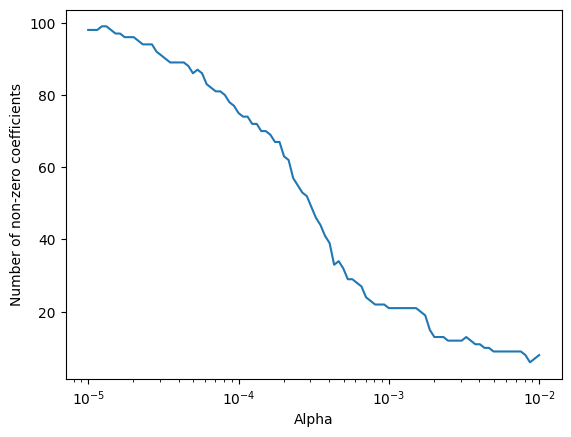

In [58]:
alpha_values = np.logspace(-5, -2, 100)

n_nonzeros = []
for alpha in alpha_values:
    model = Lasso(alpha=alpha, max_iter=10000, tol=1e-5)
    model.fit(x, y)
    n_nonzeros.append(np.count_nonzero(model.coef_))
    
plt.plot(alpha_values, n_nonzeros)
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Number of non-zero coefficients')
plt.show()

### Q6-c

/home/kami/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.879e+00, tolerance: 1.610e-03
  model = cd_fast.enet_coordinate_descent(
/home/kami/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.876e+00, tolerance: 1.610e-03
  model = cd_fast.enet_coordinate_descent(
/home/kami/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3

/home/kami/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.601e+00, tolerance: 1.610e-03
  model = cd_fast.enet_coordinate_descent(
/home/kami/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.558e+00, tolerance: 1.610e-03
  model = cd_fast.enet_coordinate_descent(
/home/kami/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3

/home/kami/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.427e-01, tolerance: 1.610e-03
  model = cd_fast.enet_coordinate_descent(
/home/kami/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.427e-01, tolerance: 1.610e-03
  model = cd_fast.enet_coordinate_descent(
/home/kami/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4

/home/kami/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.843e-01, tolerance: 1.610e-03
  model = cd_fast.enet_coordinate_descent(
/home/kami/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.517e-01, tolerance: 1.610e-03
  model = cd_fast.enet_coordinate_descent(
/home/kami/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2

/home/kami/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.121e-01, tolerance: 1.610e-03
  model = cd_fast.enet_coordinate_descent(
/home/kami/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.250e-01, tolerance: 1.610e-03
  model = cd_fast.enet_coordinate_descent(
/home/kami/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8

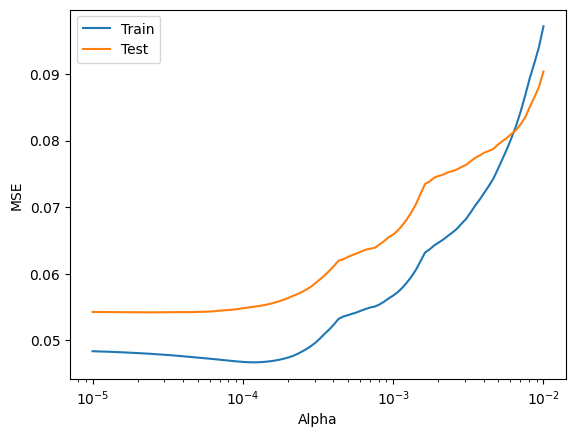

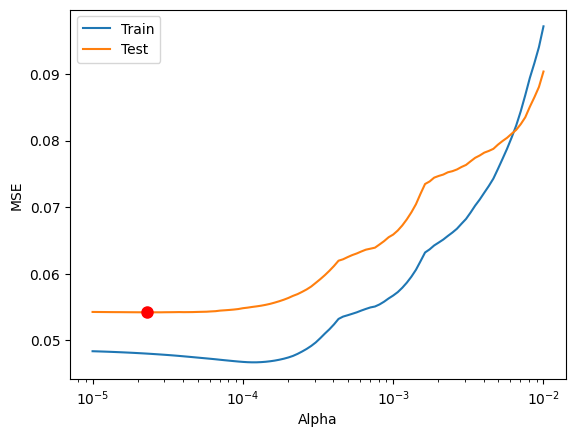

In [61]:
mse_train = []
mse_test = []

for alpha in alpha_values:
    model = Lasso(alpha=alpha, max_iter=10000, tol=1e-5)
    model.fit(x, y)
    
    y_pred_train = model.predict(x)
    mse_train.append(mean_squared_error(y, y_pred_train))
    
    y_pred_test = model.predict(x_test)
    mse_test.append(mean_squared_error(y_test, y_pred_test))

best_alpha = alpha_values[np.argmin(mse_test)]

plt.plot(alpha_values, mse_train, label='Train')
plt.plot(alpha_values, mse_test, label='Test')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.legend()
plt.show()


plt.plot(alpha_values, mse_train, label='Train')
plt.plot(alpha_values, mse_test, label='Test')
plt.plot([best_alpha], [min(mse_test)], marker='o', markersize=8, color="red")
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.legend()
plt.show()

### Q6-d

In [63]:
model = Lasso(alpha=best_alpha, max_iter=10000, tol=1e-5)
model.fit(x, y)
y_pred = model.predict(x_test)
r2 = r2_score(y_test, y_pred)
print(f"R2 score for best alpha: {r2}")

R2 score for best alpha: 0.9355261697769592


/home/kami/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.814e+00, tolerance: 1.610e-03
  model = cd_fast.enet_coordinate_descent(


### Q9

In [67]:
# compute the covariance matrix
cov = np.cov(x, rowvar=False)

In [68]:
U, s, V = np.linalg.svd(cov_matrix)

print("Singular values:", s)
print("Left singular vectors (U):", U)
print("Right singular vectors (V):", V)

Singular values: [9.91709127e+01 1.07236670e+00 2.64543964e-01 1.07665500e-01
 6.01441651e-03 2.33007477e-03 6.04341205e-04 4.04740857e-04
 7.18153275e-05 4.62254226e-05 1.89796417e-05 1.12388079e-05
 3.43808888e-06 1.81733771e-06 1.01546672e-06 7.59094438e-07
 5.49116948e-07 4.15421066e-07 2.84321635e-07 2.27535962e-07
 1.42624895e-07 1.22700448e-07 8.21211515e-08 6.60692822e-08
 5.33643400e-08 4.43984382e-08 3.60874458e-08 3.00305825e-08
 2.51145517e-08 2.19822116e-08 1.93375374e-08 1.70604883e-08
 1.57973009e-08 1.37594661e-08 1.24223103e-08 1.13878654e-08
 8.26936657e-09 7.38225122e-09 6.99203492e-09 6.47411163e-09
 5.61780355e-09 4.74926780e-09 4.53047936e-09 4.16796788e-09
 3.44464082e-09 3.27071790e-09 2.59041732e-09 2.24613679e-09
 2.18475419e-09 1.92897184e-09 1.73250737e-09 1.51042439e-09
 1.40734266e-09 1.25766679e-09 1.10235625e-09 1.09079545e-09
 1.02079057e-09 9.16824224e-10 8.90411875e-10 8.13753344e-10
 7.16272639e-10 6.53467093e-10 6.38599803e-10 5.88813445e-10
 5.5556

### Q9-a

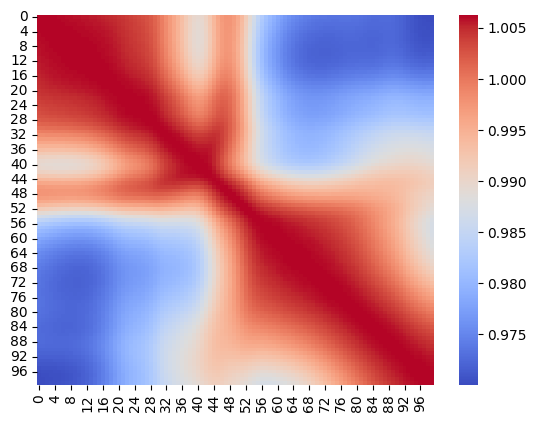

In [71]:
sns.heatmap(np.abs(cov), cmap='coolwarm')
plt.show()

### Q9-b

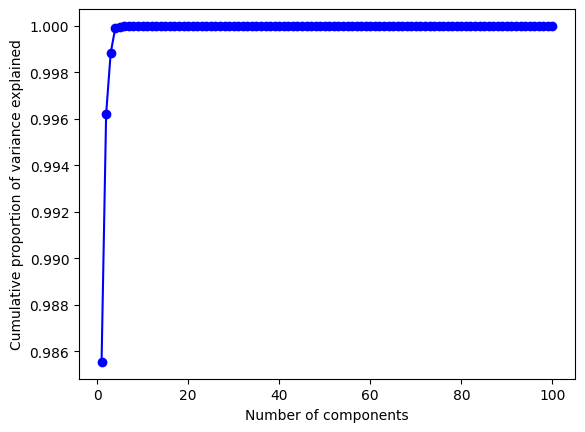

In [76]:
s = np.linalg.svd(x, full_matrices=False, compute_uv=False)

p = x.shape[1]

# proportion of variance explained by each component
variance_explained = (s**2) / np.sum(s**2)

# cumulative proportion of variance explained
cumulative_variance_explained = np.cumsum(variance_explained)

# plot the cumulative amount of variance explained by the first k components
fig, ax = plt.subplots()
ax.plot(range(1, p+1), cumulative_variance_explained, 'bo-')
ax.set_xlabel('Number of components')
ax.set_ylabel('Cumulative proportion of variance explained')
plt.show()

